# Figure6 Peaks number and average length

Peak calling tuning improvement from defaults to tuned ZINBRA.

In [26]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from IPython.display import display
import pandas as pd

peak_calling_summary='/mnt/stripe/bio/experiments/figures/Peak Calling Summary - aging.tsv'
df = pd.read_csv(peak_calling_summary, sep='\t')
df = df.loc[df['Status'] != 'Failed']

# Graphics of peaks number across different marks and tools

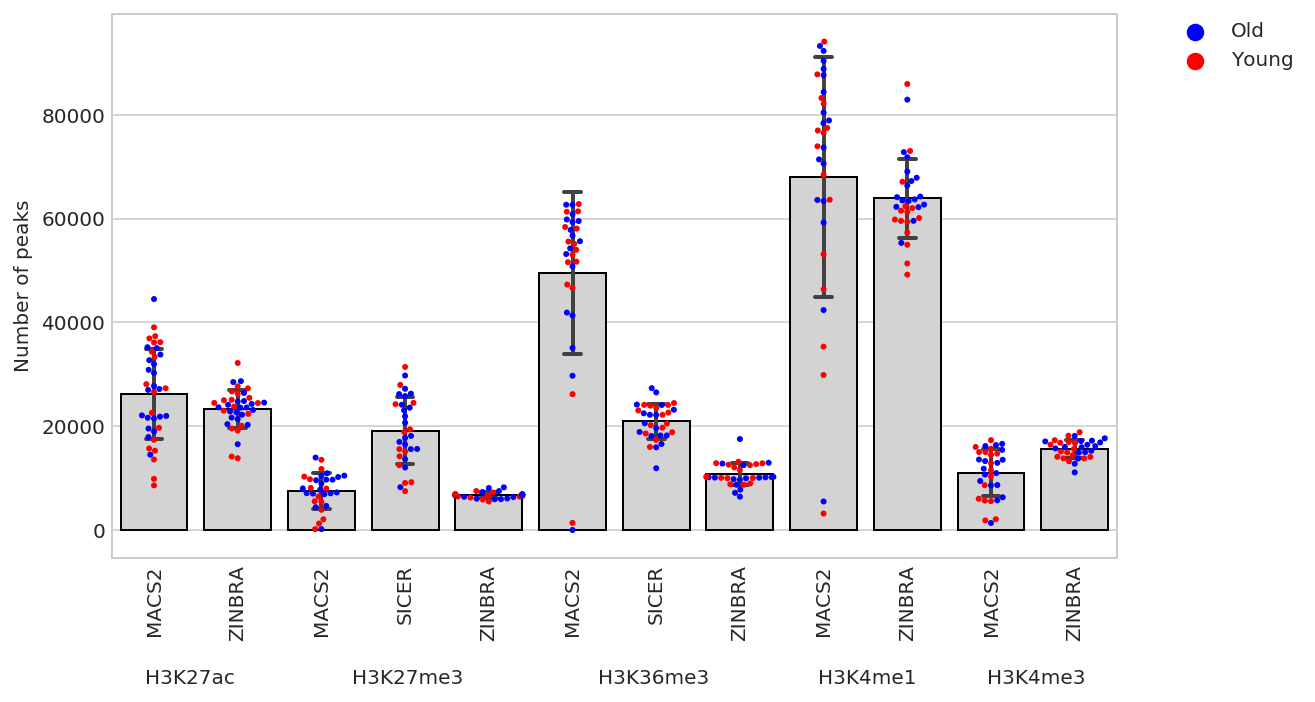

In [30]:
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict, Counter

age_palette={"Young":"red", "Old": "blue"}
tools_pallete={"MACS2": "lightgray", "SICER": "lightgray", "ZINBRA": "darkgray"}

toshow = OrderedDict([
    ("H3K27ac", [("MACS2", "default"), ("ZINBRA", "tuned")]),
    ("H3K27me3", [("MACS2", "default"), ("SICER", "default"), ("ZINBRA", "tuned")]),
    ("H3K36me3", [("MACS2", "default"), ("SICER", "default"), ("ZINBRA", "tuned")]),
    ("H3K4me1", [("MACS2", "default"), ("ZINBRA", "tuned")]),
    ("H3K4me3", [("MACS2", "default"), ("ZINBRA", "tuned")])
])

# Filter out dataframe to given combination of target, tool and procedure.
dfs = []
xlabels = []
for m, tps in toshow.items():
    for (tool, procedure) in tps:
        xlabels.append(tool)
        dfmtp = df.loc[np.logical_and(df['tool'] == tool, 
                          np.logical_and(df['modification'] == m, 
                                         df['procedure'] == procedure))]
        dfs.append(dfmtp)
dft = pd.concat(dfs, axis=0)


def plot_data(dft, value, description):
    dft['mp'] = dft['modification'] + " " + dft['tool'] + " " + dft['procedure']
    colors = [tools_pallete[tool] for tool in dft['tool']]
    dft["age"] = "Young"
    dft.loc[dft.donor.str.startswith("OD"), "age"] = "Old"

    fig = plt.figure(figsize=(int(len(set(dft['mp'])) * 0.75), 5))
    sns.set_style("whitegrid")

    ax = sns.barplot(data=dft, 
             x="mp", y=value,
             ci="sd", capsize=.2, errwidth=2,
             color="lightgray",
             edgecolor="black")

    ax = sns.swarmplot(data=dft, 
          x="mp", y=value,
          size=3, #5
          hue = "age",
          palette=age_palette,)

    plt.xticks(range(0, len(xlabels)), xlabels, rotation=90)
    plt.xlabel('')
    plt.ylabel(description)

    fig.text(.15, -.05, 'H3K27ac')
    fig.text(.31, -.05, 'H3K27me3')
    fig.text(.50, -.05, 'H3K36me3')
    fig.text(.67, -.05, 'H3K4me1')
    fig.text(.80, -.05, 'H3K4me3')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    plt.show()
    plt.close()

# Plot peaks number
plot_data(dft, 'peaks', 'Number of peaks')

# Average peak length by modification and tool

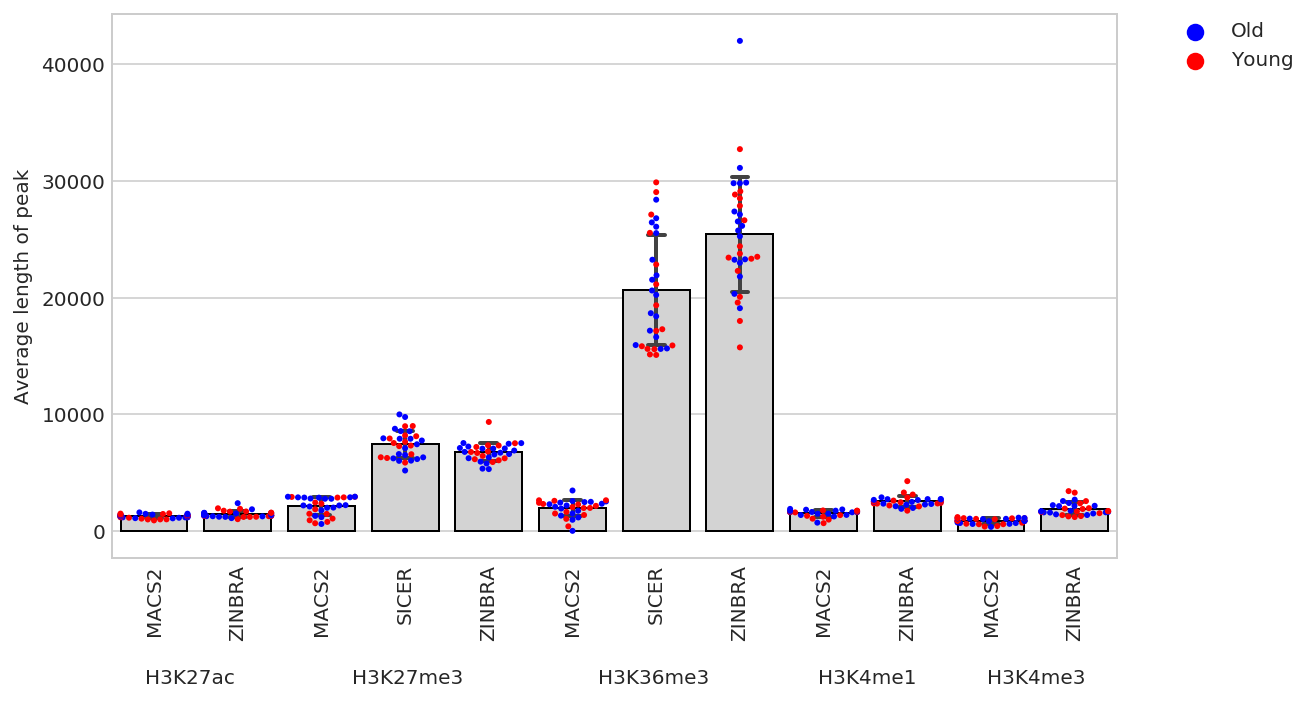

In [28]:
dft['len_avg'] = dft['length'] / dft['peaks']
dft.loc[~np.isfinite(dft["len_avg"]), "len_avg"] = 0.0
plot_data(dft, 'len_avg', 'Average length of peak')

In [29]:
# OD14 is the highest in terms of avg peaks length, 
# it has small number of peaks with big summary length and one of the highest FRIP value
display(dft.loc[dft['mp']=='H3K36me3 ZINBRA tuned'])

,donor,modification,tool,peaks,length,FRiP,procedure,params,file,tags,duplicates,Status,mp,age,len_avg
405,OD1,H3K36me3,ZINBRA,10174,316723400,47.2805,tuned,--fdr 1.0E-8 --gap 60,/mnt/stripe/bio/experiments/configs/Y20O20/ben...,57235334,0.15,NaN,H3K36me3 ZINBRA tuned,Old,31130.666405
411,OD10,H3K36me3,ZINBRA,10101,301177400,49.2646,tuned,--fdr 1.0E-8 --gap 60,/mnt/stripe/bio/experiments/configs/Y20O20/ben...,54009415,0.20,NaN,H3K36me3 ZINBRA tuned,Old,29816.592417
417,OD11,H3K36me3,ZINBRA,9790,228002400,45.2680,tuned,--fdr 1.0E-8 --gap 60,/mnt/stripe/bio/experiments/configs/Y20O20/ben...,31399345,0.16,NaN,H3K36me3 ZINBRA tuned,Old,23289.315628
423,OD12,H3K36me3,ZINBRA,17523,356178800,35.1874,tuned,--fdr 1.0E-6 --gap 40,/mnt/stripe/bio/experiments/configs/Y20O20/ben...,41828445,0.17,NaN,H3K36me3 ZINBRA tuned,Old,20326.359642
429,OD13,H3K36me3,ZINBRA,12953,247351200,57.3234,tuned,--fdr 1.0E-10 --gap 40,/mnt/stripe/bio/experiments/configs/Y20O20/ben...,50290925,0.23,NaN,H3K36me3 ZINBRA tuned,Old,19096.054968
435,OD14,H3K36me3,ZINBRA,7791,327419600,53.2111,tuned,--fdr 1.0E-8 --gap 100,/mnt/stripe/bio/experiments/configs/Y20O20/ben...,53576926,0.23,NaN,H3K36me3 ZINBRA tuned,Old,42025.362598
441,OD15,H3K36me3,ZINBRA,9675,288955800,42.2271,tuned,--fdr 1.0E-6 --gap 60,/mnt/stripe/bio/experiments/configs/Y20O20/ben...,23705995,0.08,NaN,H3K36me3 ZINBRA tuned,Old,29866.232558
447,OD16,H3K36me3,ZINBRA,9967,231767600,47.3786,tuned,--fdr 1.0E-8 --gap 60,/mnt/stripe/bio/experiments/configs/Y20O20/ben...,21130158,0.08,NaN,H3K36me3 ZINBRA tuned,Old,23253.496539
453,OD17,H3K36me3,ZINBRA,12491,272462800,40.7910,tuned,--fdr 1.0E-6 --gap 40,/mnt/stripe/bio/experiments/configs/Y20O20/ben...,23570091,0.08,NaN,H3K36me3 ZINBRA tuned,Old,21812.729165
459,OD18,H3K36me3,ZINBRA,6425,170495200,12.0295,tuned,--fdr 1.0E-4 --gap 100,/mnt/stripe/bio/experiments/configs/Y20O20/ben...,63574272,0.06,NaN,H3K36me3 ZINBRA tuned,Old,26536.217899
